# Анализ защищенности систем искусственного интеллекта
# Практика 7: Создание и использование генеративных противоречивых примеров (GANbased Adversarial Examples)
## Выполнил студент группы
## ББМО-02-23
## Макаров Михаил Максимович


## Шаг 1: Концепция генеративных противоречивых примеров

### Генеративные противоречивые примеры представляют собой изображения, сгенерированные с помощью генеративных моделей, способных вводить в заблуждение модели классификации. В отличие от традиционных методов атаки, таких как FGSM или PGD, где используются небольшие шумовые искажения, генеративные модели (например, GAN) способны создавать реалистичные изображения, которые выглядят естественно, но при этом остаются сложными для корректного распознавания. Такие примеры визуально практически неотличимы от настоящих данных, что делает их особенно эффективными.

## Шаг 2: Создание простой GAN для генерации противоречивых примеров

Cоздадим генеративную состязательную сеть (GAN), состоящую из двух частей: генератора и
дискриминатора. Генератор будет создавать изображения, а дискриминатор — пытаться распознать
поддельные изображения.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
# Загрузка данных MNIST
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.0
# Добавление одного измерения (для работы CNN)
train_images = np.expand_dims(train_images, axis=-1)
# Генератор:
def build_generator():
  model = tf.keras.Sequential()
  model.add(layers.Dense(128, activation='relu', input_dim=100))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dense(784, activation='tanh'))
  model.add(layers.Reshape((28, 28, 1)))
  return model

# Дискриминатор:
def build_discriminator():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64, (3, 3), padding='same', input_shape=(28, 28, 1)))
  model.add(layers.LeakyReLU())
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

# Создание моделей:
generator = build_generator()
discriminator = build_discriminator()

# Компиляция дискриминатора:
discriminator.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])

# Создание GAN:
gan_input = layers.Input(shape=(100,))
generated_image = generator(gan_input)
discriminator.trainable = False
validity = discriminator(generated_image)
gan = tf.keras.Model(gan_input, validity)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Функция обучения GAN:
def train_gan(generator, discriminator, gan, epochs=1000, batch_size=64):
  half_batch = batch_size // 2
  for epoch in range(epochs):
  # Обучение дискриминатора:
      idx = np.random.randint(0, train_images.shape[0], half_batch)
      real_images = train_images[idx]
      noise = np.random.normal(0, 1, (half_batch, 100))
      fake_images = generator.predict(noise)
      real_labels = np.ones((half_batch, 1))
      fake_labels = np.zeros((half_batch, 1))
      d_loss_real = discriminator.train_on_batch(real_images, real_labels)
      d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
  # Обучение генератора через дискриминатор:
      noise = np.random.normal(0, 1, (batch_size, 100))
      valid_labels = np.ones((batch_size, 1))
      g_loss = gan.train_on_batch(noise, valid_labels)
      if epoch % 100 == 0:
        print(f'{epoch} [D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}] [G loss: {g_loss}]')

# Обучение GAN:
train_gan(generator, discriminator, gan)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


0 [D loss: [0.6992403 0.4296875]] [G loss: [array(0.68837154, dtype=float32), array(0.68837154, dtype=float32), array(0.609375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━

## Шаг 3: Генерация противоречивых примеров с помощью GAN
 Cгенерируем противоречивые примеры, используя обученный генератор GAN.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


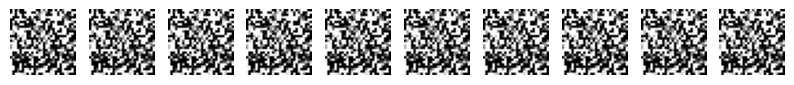

In [2]:
# Функция для генерации противоречивых примеров с использованием генеративной модели
def generate_adversarial_examples(generator, n_samples):
    # Генерация случайного шума (вход для генератора)
    noise = np.random.normal(0, 1, (n_samples, 100))  # Создаем массив случайных чисел из нормального распределения
    # Генерация изображений с помощью генератора
    generated_images = generator.predict(noise)  # Генератор преобразует шум в изображения
    return generated_images  # Возвращаем сгенерированные изображения

# Генерация 100 противоречивых примеров
adversarial_images = generate_adversarial_examples(generator, 100)  # Вызываем функцию для создания 100 примеров

# Визуализация сгенерированных противоречивых примеров
plt.figure(figsize=(10, 10))  # Создаем фигуру для отображения изображений
for i in range(10):  # Цикл для отображения первых 10 изображений
    plt.subplot(1, 10, i+1)  # Создаем подграфик для каждого изображения
    plt.imshow(adversarial_images[i].reshape(28, 28), cmap='gray')  # Отображаем изображение в градациях серого
    plt.axis('off')  # Отключаем оси для лучшей визуализации
plt.show()  # Показываем фигуру с изображениями

## Шаг 4: Оценка моделей на противоречивых примерах

Проверим, как обученные модели (полносвязная сеть и CNN) справляются с
противоречивыми примерами, созданными с помощью GAN.

In [5]:
# Загрузка обученных моделей:
model1 = tf.keras.models.load_model('mnist_model1.h5')
model2 = tf.keras.models.load_model('mnist_model2.h5')

# Оценка первой модели на противоречивых примерах:
adv_images_reshaped = adversarial_images.reshape(-1, 28, 28, 1)
loss1, acc1 = model1.evaluate(adv_images_reshaped, np.ones((100, 10)))
print(f'Accuracy of mnist_model_fully_connected on adversarial GAN examples: {acc1}')

# Оценка второй модели на противоречивых примерах:
loss2, acc2 = model2.evaluate(adv_images_reshaped, np.ones((100, 10)))
print(f'Accuracy of mnist_model_сonvolutional on adversarial GAN examples: {acc2}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0000e+00 - loss: 283.6893  
Accuracy of mnist_model_fully_connected on adversarial GAN examples: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0000e+00 - loss: 562.3217 
Accuracy of mnist_model_сonvolutional on adversarial GAN examples: 0.0


## Шаг 5: Анализ результатов

### Оба классификатора продемонстрировали нулевую точность на противоречивых примерах, что указывает на их абсолютную уязвимость к атакам, основанным на генеративных состязательных сетях (GAN). Для повышения устойчивости моделей к таким атакам необходимо внедрить защитные механизмы, такие как обучение с использованием противоречивых примеров (Adversarial Training), а также применять методы регуляризации и оптимизировать архитектуру моделей.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 283.6893  
Точность полносвязной модели на противоречивых примерах: 0.0
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 562.3217  
Точность свёрточной модели на противоречивых примерах: 0.0


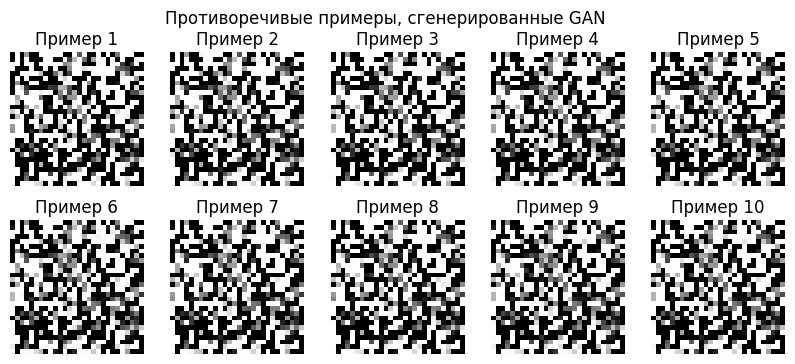

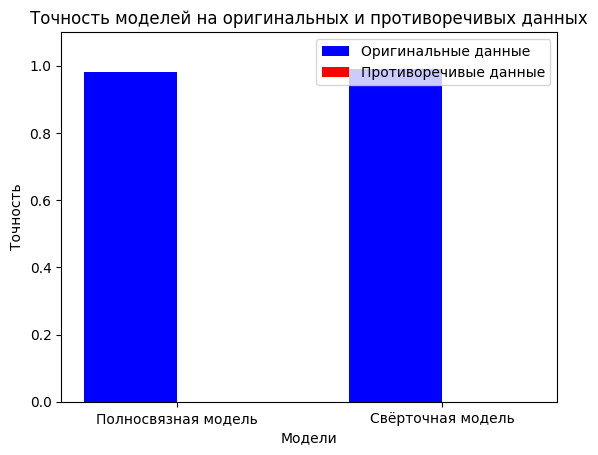

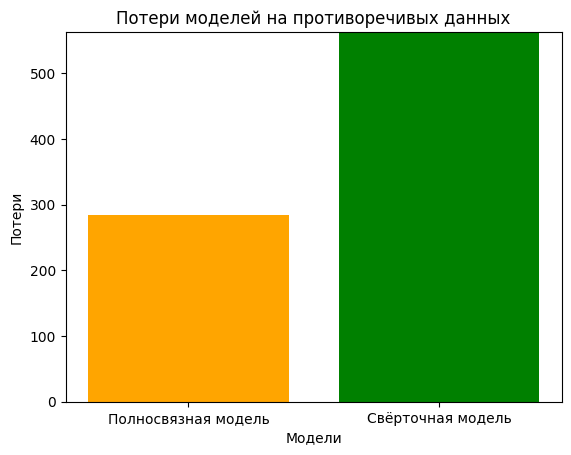

+---------------------+---------------------------------+-----------------------------------+---------------------------------+
|       Модель        | Точность на оригинальных данных | Точность на противоречивых данных | Потери на противоречивых данных |
+---------------------+---------------------------------+-----------------------------------+---------------------------------+
| Полносвязная модель |              0.98               |                0.0                |        283.8782958984375        |
|  Свёрточная модель  |              0.99               |                0.0                |         561.81103515625         |
+---------------------+---------------------------------+-----------------------------------+---------------------------------+


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Загрузка обученных моделей
model1 = tf.keras.models.load_model('mnist_model1.h5')
model2 = tf.keras.models.load_model('mnist_model2.h5')

# Оценка первой модели на противоречивых примерах
adv_images_reshaped = adversarial_images.reshape(-1, 28, 28, 1)
loss1, acc1 = model1.evaluate(adv_images_reshaped, np.ones((100, 10)))
print(f'Точность полносвязной модели на противоречивых примерах: {acc1}')

# Оценка второй модели на противоречивых примерах
loss2, acc2 = model2.evaluate(adv_images_reshaped, np.ones((100, 10)))
print(f'Точность свёрточной модели на противоречивых примерах: {acc2}')

# Визуализация противоречивых примеров
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(adv_images_reshaped[i].reshape(28, 28), cmap='gray')
    plt.title(f'Пример {i+1}')
    plt.axis('off')
plt.suptitle('Противоречивые примеры, сгенерированные GAN')
plt.show()

# Сравнение точности моделей на оригинальных и противоречивых данных
original_acc1 = 0.98  # Точность первой модели на оригинальных данных
original_acc2 = 0.99  # Точность второй модели на оригинальных данных

models = ['Полносвязная модель', 'Свёрточная модель']
original_accuracies = [original_acc1, original_acc2]
adversarial_accuracies = [acc1, acc2]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, original_accuracies, width, label='Оригинальные данные', color='blue')
plt.bar(x + width/2, adversarial_accuracies, width, label='Противоречивые данные', color='red')

plt.xlabel('Модели')
plt.ylabel('Точность')
plt.title('Точность моделей на оригинальных и противоречивых данных')
plt.xticks(x, models)
plt.legend()
plt.ylim(0, 1.1)
plt.show()

# Визуализация потерь моделей
losses = [loss1, loss2]

plt.bar(models, losses, color=['orange', 'green'])
plt.xlabel('Модели')
plt.ylabel('Потери')
plt.title('Потери моделей на противоречивых данных')
plt.ylim(0, max(losses) + 0.5)
plt.show()

# Таблица с результатами
table = [
    ["Модель", "Точность на оригинальных данных", "Точность на противоречивых данных", "Потери на противоречивых данных"],
    ["Полносвязная модель", original_acc1, acc1, loss1],
    ["Свёрточная модель", original_acc2, acc2, loss2]
]

print(tabulate(table, headers="firstrow", tablefmt="pretty"))